In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


Visualizing the data. 
ref. https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib/20107592#20107592 

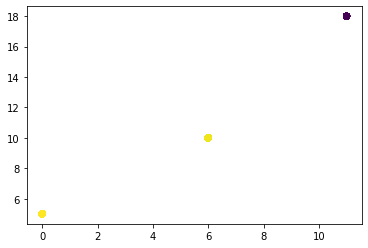

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import gaussian_kde

#receive clean data from booksSynopsis_ageRange_clean.csv file - 
books_df = pd.read_csv("/gdrive/My Drive/MSC_Thesis_Project/Data/bookSynopsis_ageRange_clean.csv")

#calculating the point density - 
xy = np.vstack([books_df['lower_age'],books_df['upper_age']])
z = gaussian_kde(xy)(xy)

#visualizing data using the scatter plot - 
fig, ax= plt.subplots()
ax.scatter(books_df['lower_age'], books_df['upper_age'], c = z)
plt.show()



It is observed that most books are for the age ranges (0-12 years). 
The graph shows null correlation. 
We can also observe that there is only one record with outlyer where upper-age range is 99. 
There are also few books which have age range of 13-18 and 15-18

---



In [ ]:
books_df['Reading_age']
s=[]

for i in books_df.index: 
   s = books_df['Reading_age'][i].split('-')
   lower = int(s[0])
   upper = int(s[1])
   if(lower<10): 
      s[0]= "0"+s[0]
   if(upper<10):   
      s[1]= "0"+s[1]
   
   books_df['Reading_age'][i] = s[0]+"-"+s[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
#plot the graph for the count of books on y-axis and age range on x-axis

grp = books_df.groupby('Reading_age')

grp.count()


,Unnamed: 0,Title,Desc,lower_age,upper_age
Reading_age,,,,,
00-05,691,691,691,691,691
06-10,678,678,678,678,678
11-18,212,212,212,212,212


following are the groups derived when grouped by 'Reading_Age'

	0-0, 0-11, 0-12, 0-2, 0-3, 0-4, 0-5, 0-6, 0-7, 0-9,
	1-12, 1-2, 1-3, 1-4, 1-5, 1-6, 1-7, 1-8, 
	2-12, 2-4, 2-5, 2-6, 2-7, 2-8, 2-9,
	3-11, 3-12, 3-4, 3-5, 3-6, 3-7, 3-8, 3-9,
	4-10, 4-11, 4-5, 4-6, 4-7, 4-8, 4-9,
	5-10, 5-12, 5-6, 5-7, 5-8, 5-9,
	6-10, 6-11, 6-12, 6-7, 6-8, 6-9, 
	7-10, 7-11, 7-12, 7-8, 7-9, 
	8-10, 8-11, 8-12, 8-9,
	9-10, 9-11, 9-12, 9-13, 9-14
	10-11, 10-12, 10-14, 10-18, 
	11-12, 11-14, 11-15, 11-18, 
	12-14, 12-18, 
	13-14, 13-18, 
	14-18, 
	15-18,    

In [ ]:
# it is observed that there are records with age range 2-12, 0-12, 0-9, 4-5, 5-6, 6-7, 3-12
# it is unusual that the age range is either too small 4-5 
# or the age range is too large 0-12, 2-12. 

# displaying records which have difference in lower and upper age ranges greater than 5 . 
l=0
u=0

for i in books_df.index:
    l= books_df['lower_age'][i]
    u= books_df['upper_age'][i]
    if(u-l>5):
       print(books_df['Title'][i],books_df['Reading_age'][i]) 


A Flash of Blue 11-18
A Song for Summer 11-18
A.N.T.I.D.O.T.E 11-18
Alex Rider Mission 2: Point Blanc 11-18
Alex Rider Mission 3: Skeleton Key 11-18
Alex Rider Mission 4: Eagle Strike 11-18
Alex Rider Mission 5: Scorpia 11-18
Amy & Roger's Epic Detour 11-18
An Episode of Sparrows 11-18
Angus, Thongs and Full-Frontal Snogging 11-18
Blood 11-18
Buffalo Soldier 11-18
Butter 11-18
CHERUB: The Recruit 11-18
Captive 11-18
Carrying the Elephant: A Memoir of Love and Loss 11-18
Checkmate 11-18
Clockwork 11-18
Coraline 11-18
Counting Stars 11-18
Dancing in My Nuddy-pants! 11-18
Dangerous Reality 11-18
Dark Inside 11-18
Dead Gorgeous 11-18
Dead Jealous 11-18
Double Cross 11-18
Eagle of the Ninth 11-18
Etiquette and Espionage 11-18
Fat Boy Swim 11-18
Feather Boy 11-18
Flightsend 11-18
Flyaway 11-18
Frankenstein 11-18
Freak the Mighty 11-18
Ghost World 11-18
Girl Out of Water 11-18
Girls Under Pressure 11-18
Glass Sword 11-18
Goggle-Eyes 11-18
Holding Up the Universe 11-18
Holes 11-18
I Capture th

On checking the values of Book titles and reading-age ranges, they seem to be on par with the Amazon website. Since the records are retrieved from Kaggle   (https://www.kaggle.com/modhiibrahimalmannaa/1000-children-books-on-amazom)
the dataset is a collection of books on Amazon


In [ ]:
#Extracting groups which have only one record 
g = books_df.groupby('Reading_age')['Title'].count()


g.reset_index(name = 'n')

max(g)

691

In [ ]:
#for i in g.index: 
#  if (g['n'][i]==1) :
#      print(g['Reading_age'][i],g['n'][i])

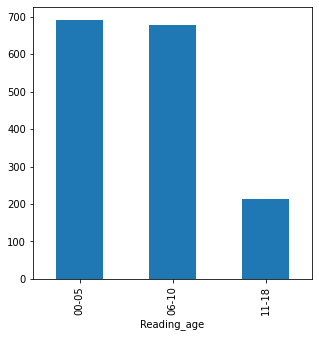

In [ ]:
#plot the graph for the count of books on y-axis and age range on x-axis
import seaborn as sns

#grp = books_df.groupby('Reading_age')['Title'].count().plot(kind="bar")

grp = books_df.groupby('Reading_age')['Title'].count().plot(kind="bar", rot=90, figsize=(5,5))
grp

It is observed that the count of records per group has min of 1 and max of 200.
Hence, the following segregation of records will be made - 
There are 80 groups- 
70% of each group will go for Training set 
15% of each group will go for Testing Set 
15% of each group will go for validation set
